# Libraries

In [1]:
from sklearn.experimental import enable_iterative_imputer

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

# Data

In [2]:
data = sns.load_dataset('titanic')
columns = [i.capitalize() for i in data.columns]
data.columns = columns
data.head()

,Survived,Pclass,Sex,Age,Sibsp,Parch,Fare,Embarked,Class,Who,Adult_male,Deck,Embark_town,Alive,Alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
data.tail()

,Survived,Pclass,Sex,Age,Sibsp,Parch,Fare,Embarked,Class,Who,Adult_male,Deck,Embark_town,Alive,Alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


# EDA

## Summary

In [4]:
rows,cols = data.shape

print(f"Columns: {', '.join(columns)}")
print('Rows Cols')
print(rows,' ',cols)

Columns: Survived, Pclass, Sex, Age, Sibsp, Parch, Fare, Embarked, Class, Who, Adult_male, Deck, Embark_town, Alive, Alone
Rows Cols
891   15


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Survived     891 non-null    int64   
 1   Pclass       891 non-null    int64   
 2   Sex          891 non-null    object  
 3   Age          714 non-null    float64 
 4   Sibsp        891 non-null    int64   
 5   Parch        891 non-null    int64   
 6   Fare         891 non-null    float64 
 7   Embarked     889 non-null    object  
 8   Class        891 non-null    category
 9   Who          891 non-null    object  
 10  Adult_male   891 non-null    bool    
 11  Deck         203 non-null    category
 12  Embark_town  889 non-null    object  
 13  Alive        891 non-null    object  
 14  Alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [6]:
data.isnull().sum()/len(data)*100

Survived        0.000000
Pclass          0.000000
Sex             0.000000
Age            19.865320
Sibsp           0.000000
Parch           0.000000
Fare            0.000000
Embarked        0.224467
Class           0.000000
Who             0.000000
Adult_male      0.000000
Deck           77.216611
Embark_town     0.224467
Alive           0.000000
Alone           0.000000
dtype: float64

## Missing Value Treatment

In [7]:
# Drop deck: high missing Value
data2 = data.drop('Deck',axis=1)

In [8]:
data2.head()

,Survived,Pclass,Sex,Age,Sibsp,Parch,Fare,Embarked,Class,Who,Adult_male,Embark_town,Alive,Alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [9]:
data2.Age = data.Age.fillna(data.Age.median())

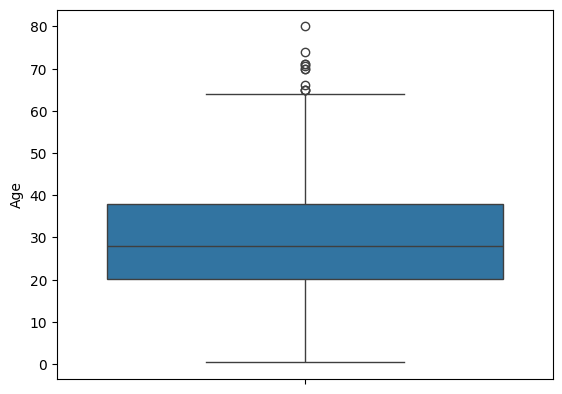

In [10]:
sns.boxplot(data['Age'])
plt.show()

In [11]:
data2.Embarked = data2.Embarked.fillna(data2.Embarked.mode()[0])
data2.Embark_town = data2.Embark_town.fillna(data2.Embark_town.mode()[0])

In [12]:
describe = data.describe(include='all')
describe.fillna('➖').to_csv('descriptive_stats.csv')
describe.fillna('➖')

,Survived,Pclass,Sex,Age,Sibsp,Parch,Fare,Embarked,Class,Who,Adult_male,Deck,Embark_town,Alive,Alone
count,891.0,891.0,891,714.0,891.0,891.0,891.0,889,891,891,891,203,889,891,891
unique,➖,➖,2,➖,➖,➖,➖,3,3,3,2,7,3,2,2
top,➖,➖,male,➖,➖,➖,➖,S,Third,man,True,C,Southampton,no,True
freq,➖,➖,577,➖,➖,➖,➖,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,➖,29.699118,0.523008,0.381594,32.204208,➖,➖,➖,➖,➖,➖,➖,➖
std,0.486592,0.836071,➖,14.526497,1.102743,0.806057,49.693429,➖,➖,➖,➖,➖,➖,➖,➖
min,0.0,1.0,➖,0.42,0.0,0.0,0.0,➖,➖,➖,➖,➖,➖,➖,➖
25%,0.0,2.0,➖,20.125,0.0,0.0,7.9104,➖,➖,➖,➖,➖,➖,➖,➖
50%,0.0,3.0,➖,28.0,0.0,0.0,14.4542,➖,➖,➖,➖,➖,➖,➖,➖
75%,1.0,3.0,➖,38.0,1.0,0.0,31.0,➖,➖,➖,➖,➖,➖,➖,➖


In [13]:
data2.isnull().sum()


Survived       0
Pclass         0
Sex            0
Age            0
Sibsp          0
Parch          0
Fare           0
Embarked       0
Class          0
Who            0
Adult_male     0
Embark_town    0
Alive          0
Alone          0
dtype: int64

In [14]:
data3 = data2.copy()

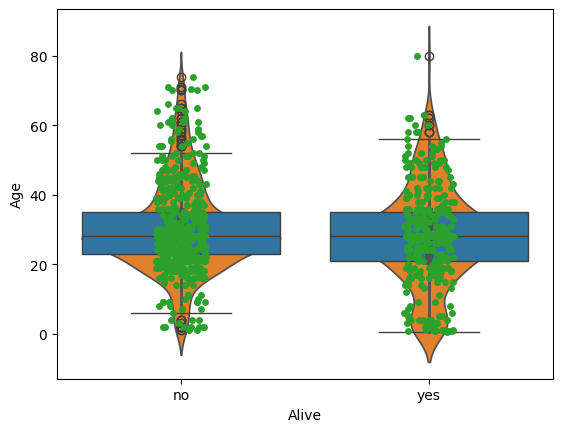

In [15]:
sns.boxplot(x='Alive',y='Age',data=data3)
sns.violinplot(x='Alive',y='Age',data=data3)
sns.stripplot(x='Alive',y='Age',data=data3)
plt.show()

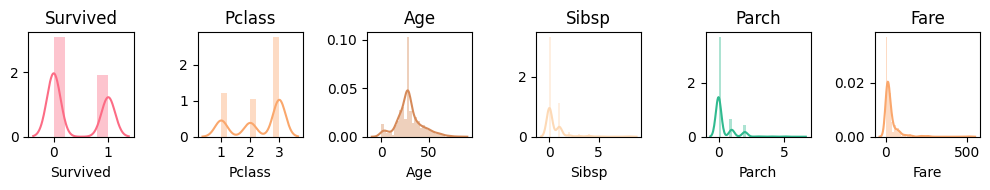

In [16]:
color = list(sns.palettes.crayons.values())

plt.figure(figsize=(10,2))
for ind,column in enumerate(data3.select_dtypes('number').columns):
    # print(column,ind)
    c = np.random.randint(len(color))
    plt.subplot(1,6,ind+1)
    sns.distplot(data3[column],color=color[c])
    plt.title(column)
    plt.ylabel('')

plt.tight_layout()
plt.show()

# Learning Enviroment

In [17]:
X,Y = data3.drop(['Alive','Survived'],axis=1),data3.Survived

In [18]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Pclass       891 non-null    int64   
 1   Sex          891 non-null    object  
 2   Age          891 non-null    float64 
 3   Sibsp        891 non-null    int64   
 4   Parch        891 non-null    int64   
 5   Fare         891 non-null    float64 
 6   Embarked     891 non-null    object  
 7   Class        891 non-null    category
 8   Who          891 non-null    object  
 9   Adult_male   891 non-null    bool    
 10  Embark_town  891 non-null    object  
 11  Alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(3), object(4)
memory usage: 65.5+ KB


In [19]:
X_enc = pd.get_dummies(X,drop_first=True,).astype(float)
X_enc.head()

,Pclass,Age,Sibsp,Parch,Fare,Adult_male,Alone,Sex_male,Embarked_Q,Embarked_S,Class_Second,Class_Third,Who_man,Who_woman,Embark_town_Queenstown,Embark_town_Southampton
0,3.0,22.0,1.0,0.0,7.2500,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
1,1.0,38.0,1.0,0.0,71.2833,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3.0,26.0,0.0,0.0,7.9250,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
3,1.0,35.0,1.0,0.0,53.1000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,3.0,35.0,0.0,0.0,8.0500,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0


## HoldOut

In [20]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X_enc,Y.astype(int),random_state=False,shuffle=False,test_size=.20)

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

log = LogisticRegression()
log.fit(x_train,y_train)

pred = log.predict(x_test)

print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       115
           1       0.84      0.83      0.83        64

    accuracy                           0.88       179
   macro avg       0.87      0.87      0.87       179
weighted avg       0.88      0.88      0.88       179



## Leave One Outp

In [22]:
from sklearn.model_selection import LeavePOut

lpo=LeavePOut(p=1)
lpo.get_n_splits(x_train)

8658957720207116946976

In [116]:
test_idx

array([0])

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_dict = {}
log = LogisticRegression()

for train_idx, test_idx in list(lpo.split(x_train)):
    train_x,train_y,test_x,test_y = X_enc.loc[train_idx],Y[train_idx],X_enc[test_idx],Y[test_idx]
    log.fit(train_x,train_y)
    pred = log.predict(test_x)
    accuracy_dict[split_num[0]]=accuracy_score(test_y,pred)

In [ ]:
plt.figure(figsize=(15,3))
plt.plot(accuracy_dict.values())
plt.show()

In [ ]:
avg = round(np.mean(list(accuracy_dict.values())),2)

### 

In [111]:
from sklearn.model_selection import LeaveOneOut

help(LeaveOneOut)

Help on class LeaveOneOut in module sklearn.model_selection._split:

class LeaveOneOut(BaseCrossValidator)
 |  Leave-One-Out cross-validator.
 |  
 |  Provides train/test indices to split data in train/test sets. Each
 |  sample is used once as a test set (singleton) while the remaining
 |  samples form the training set.
 |  
 |  Note: ``LeaveOneOut()`` is equivalent to ``KFold(n_splits=n)`` and
 |  ``LeavePOut(p=1)`` where ``n`` is the number of samples.
 |  
 |  Due to the high number of test sets (which is the same as the
 |  number of samples) this cross-validation method can be very costly.
 |  For large datasets one should favor :class:`KFold`, :class:`ShuffleSplit`
 |  or :class:`StratifiedKFold`.
 |  
 |  Read more in the :ref:`User Guide <leave_one_out>`.
 |  
 |  Examples
 |  --------
 |  >>> import numpy as np
 |  >>> from sklearn.model_selection import LeaveOneOut
 |  >>> X = np.array([[1, 2], [3, 4]])
 |  >>> y = np.array([1, 2])
 |  >>> loo = LeaveOneOut()
 |  >>> loo.get